4129.36 &8263.71 &12389.4 &16523.9 &20641.3 &24771.2 &28881.9 &

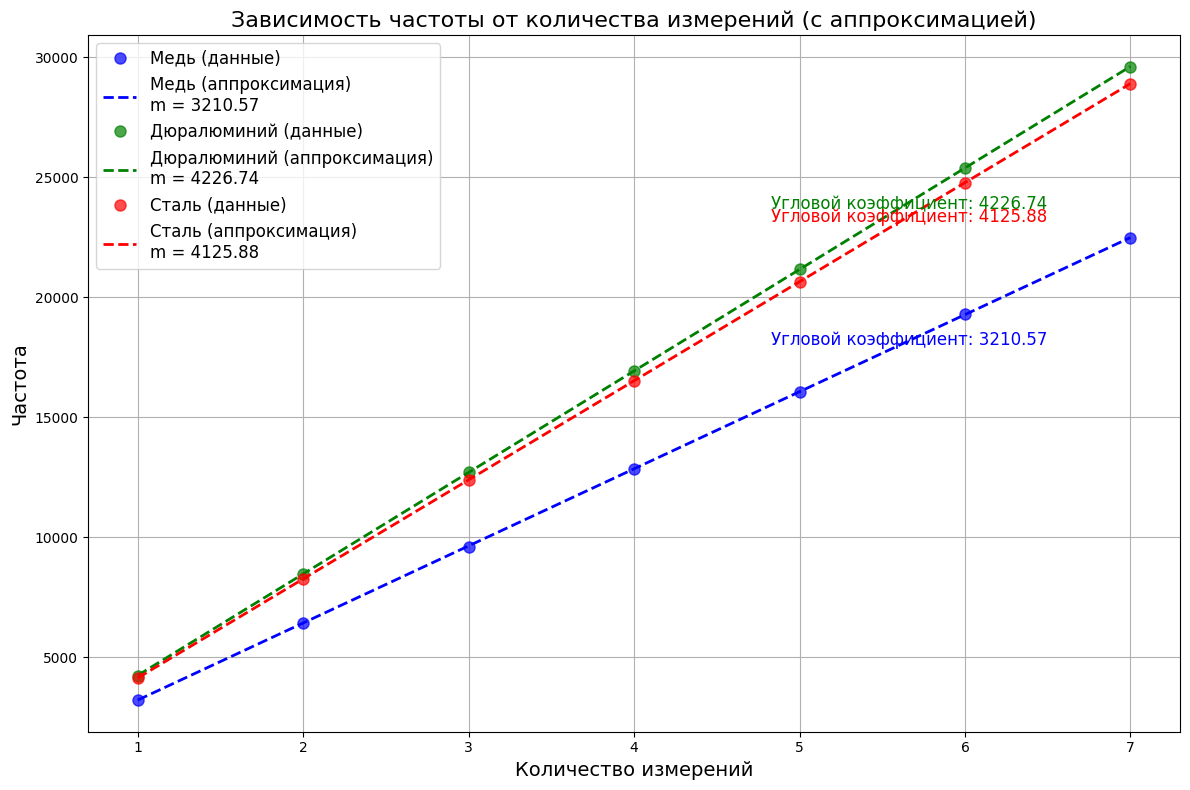

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

measurements = np.array([1, 2, 3, 4, 5, 6, 7])
copper = np.array([3218, 6434.6, 9610.5, 12858.5, 16064.5, 19281.8, 22467.2])
duralumin = np.array([4232.75, 8470.55, 12703.2, 16932.5, 21157.2, 25376.4, 29593.8])
steel = np.array([4129.36, 8263.71, 12389.4, 16523.9, 20641.3, 24771.2, 28881.9])
for i in steel:
  print(i, end= " &")

#mnk
def least_squares(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    return m, c

m_copper, c_copper = least_squares(measurements, copper)
m_duralumin, c_duralumin = least_squares(measurements, duralumin)
m_steel, c_steel = least_squares(measurements, steel)

x_line = np.linspace(measurements.min(), measurements.max(), 100)
y_copper_line = m_copper * x_line + c_copper
y_duralumin_line = m_duralumin * x_line + c_duralumin
y_steel_line = m_steel * x_line + c_steel

plt.figure(figsize=(12, 8))

#cuprum
plt.plot(measurements, copper, 'o', label='Медь (данные)', color='blue', markersize=8, alpha=0.7)
plt.plot(x_line, y_copper_line, label=f'Медь (аппроксимация)\nm = {m_copper:.2f}', 
         color='blue', linewidth=2, linestyle='--')  # Пунктирная линия для аппроксимации
plt.text(6.5, y_copper_line[-1] * 0.8, f'Угловой коэффициент: {m_copper:.2f}', 
         color='blue', fontsize=12, ha='right')

#allum
plt.plot(measurements, duralumin, 'o', label='Дюралюминий (данные)', color='green', markersize=8, alpha=0.7)
plt.plot(x_line, y_duralumin_line, label=f'Дюралюминий (аппроксимация)\nm = {m_duralumin:.2f}', 
         color='green', linewidth=2, linestyle='--')
plt.text(6.5, y_duralumin_line[-1] * 0.8, f'Угловой коэффициент: {m_duralumin:.2f}', 
         color='green', fontsize=12, ha='right')

#steel
plt.plot(measurements, steel, 'o', label='Сталь (данные)', color='red', markersize=8, alpha=0.7)
plt.plot(x_line, y_steel_line, label=f'Сталь (аппроксимация)\nm = {m_steel:.2f}', 
         color='red', linewidth=2, linestyle='--')
plt.text(6.5, y_steel_line[-1] * 0.8, f'Угловой коэффициент: {m_steel:.2f}', 
         color='red', fontsize=12, ha='right')

plt.xlabel('Количество измерений', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Зависимость частоты от количества измерений (с аппроксимацией)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()  # autoscale
plt.show()